In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline
import torch   
import torch.nn as nn
from utils.data_utils import getDataProviders
from utils.arg_extractor import get_args
from utils.experiment_builder import ExperimentBuilder
from utils.utils import load_net
import numpy as np
import pandas as pd

In [16]:
model_path = '../experiments_results/resnet56_cifar10/saved_models/train_model_best_readable'
model_dict = torch.load(model_path, map_location='cpu')
net = load_net('resnet56', model_path, 10)
nets = {
#         'resnet56_cifar10': 'cifar10',
#         'resnet56_cifar10_fgsm': 'cifar10',
        'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
        'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
#         'densenet121_cifar10_fgsm': 'cifar10',
        'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
        'densenet121_cifar100_pgd': 'cifar100'
}


# models = {}
# for net,dataset in nets.items():
#     model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
#     model_dict = torch.load(model_path, map_location='cpu')
#     architecture= net.split('_')[0]
#     load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
#     models[net] = load_network  

train_summary = {}
validation_summary = {}
test_summary = {}

adv_val_acc = {}
clean_val_acc = {}
val_acc = {}

train_clean = {}
train_combined = {}
train_adversarial = {}

models = {}
for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['train_loss']
    
    
    
    clean_val_acc[net] = data_train['clean_val_acc']
    val_acc[net] = data_train['val_acc']
    adv_val_acc[net] = data_train['adv_val_acc']
    
    
    train_clean[net] = data_train['clean_train_acc']
    train_combined[net] = data_train['train_acc']
    train_adversarial[net] = data_train['adv_train_acc']

#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    


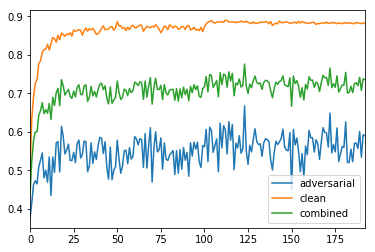

In [13]:
adv_val_acc['resnet56_cifar10_pgd'].plot(label = 'adversarial')
clean_val_acc['resnet56_cifar10_pgd'].plot(label = 'clean')
val_acc['resnet56_cifar10_pgd'].plot(label = 'combined')
plt.legend()


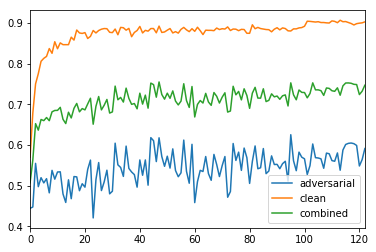

In [14]:
adv_val_acc['densenet121_cifar10_pgd'].plot(label = 'adversarial')
clean_val_acc['densenet121_cifar10_pgd'].plot(label = 'clean')
val_acc['densenet121_cifar10_pgd'].plot(label = 'combined')
plt.legend()


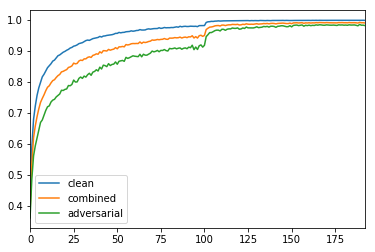

In [18]:
train_clean['resnet56_cifar10_pgd'].plot(label = 'clean')
train_combined['resnet56_cifar10_pgd'].plot(label = 'combined')
train_adversarial['resnet56_cifar10_pgd'].plot(label = 'adversarial')
plt.legend()



## Adversarial plots

In [76]:
model_path = '../experiments_results/resnet56_cifar10/saved_models/train_model_best_readable'
model_dict = torch.load(model_path, map_location='cpu')
net = load_net('resnet56', model_path, 10)
nets = {
#         'resnet56_cifar10': 'cifar10',
        'resnet56_cifar10_fgsm': 'cifar10',
        'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
        'resnet56_cifar100_fgsm': 'cifar100',
        'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
        'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
        'densenet121_cifar100_fgsm': 'cifar100',
        'densenet121_cifar100_pgd': 'cifar100'
}


models = {}
for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    architecture= net.split('_')[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  

train_summary = {}
validation_summary = {}
test_summary = {}

models = {}
for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['adv_train_loss']
    validation_summary[net] = data_train['adv_val_acc']
    data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_summary[net] = data_test['test_acc']
    

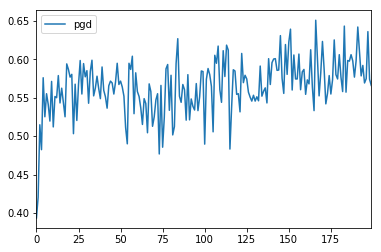

In [82]:
# validation_summary['resnet56_cifar10_fgsm'].plot(label = 'fgsm')
validation_summary['resnet56_cifar10_pgd'].plot(label='pgd')
plt.legend()

# Cifar10 Baselines

    

# Cifar 100 Baselines

# Checking Transfer Results

In [1]:
nets = {
        'transfer_densenet121_fgsm_nat': 'cifar10',
        'transfer_densenet121_nat_fgsm': 'cifar10',
        'transfer_densenet121_nat_nat': 'cifar10',
        
        'transfer_resnet56_nat_fgsm': 'cifar100',
        'transfer_resnet56_nat_nat': 'cifar100',
        'transfer_resnet56_fgsm_nat': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
#         'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
}


models = {}
for net,dataset in nets.items():
    model_path = '../experiments_results/transfer'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    architecture= net.split('_')[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  

train_summary = {}
validation_summary = {}
test_summary = {}

models = {}
for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['train_loss']
    validation_summary[net] = data_train['val_loss']
    data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_summary[net] = data_test['test_acc']
    

    

NameError: name 'torch' is not defined